# BASELINE PIPELINE
> Dev log (format < Date > | <Author(s)> )  
> - Created: 28 July 2023 | JiHoon Kim <br>
> - Refactored:  8 Aug 2023 | Roshan Rane <br>

![Diagram](https://github.com/RoshanRane/toybrains/assets/39021807/50ea3447-536f-4977-803e-7ff7668a48f1)

## import libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import sys, os

In [30]:
# add custom imports
sys.path.append("../clinicalNIML/")
from pyscripts.plotResults import plot_result

from create_toybrains import ToyBrainsData
from utils.pipeline import run_baseline_pipeline, run_baseline, run_supervised, run_unsupervised

## Check data generation config
Check the configurations set between Image generation attributes and covariates and labels before  generating the toybrains data

In [7]:
DATA_GEN_CONFIG='lbls-3bin_covs-3_17Jul23.py'

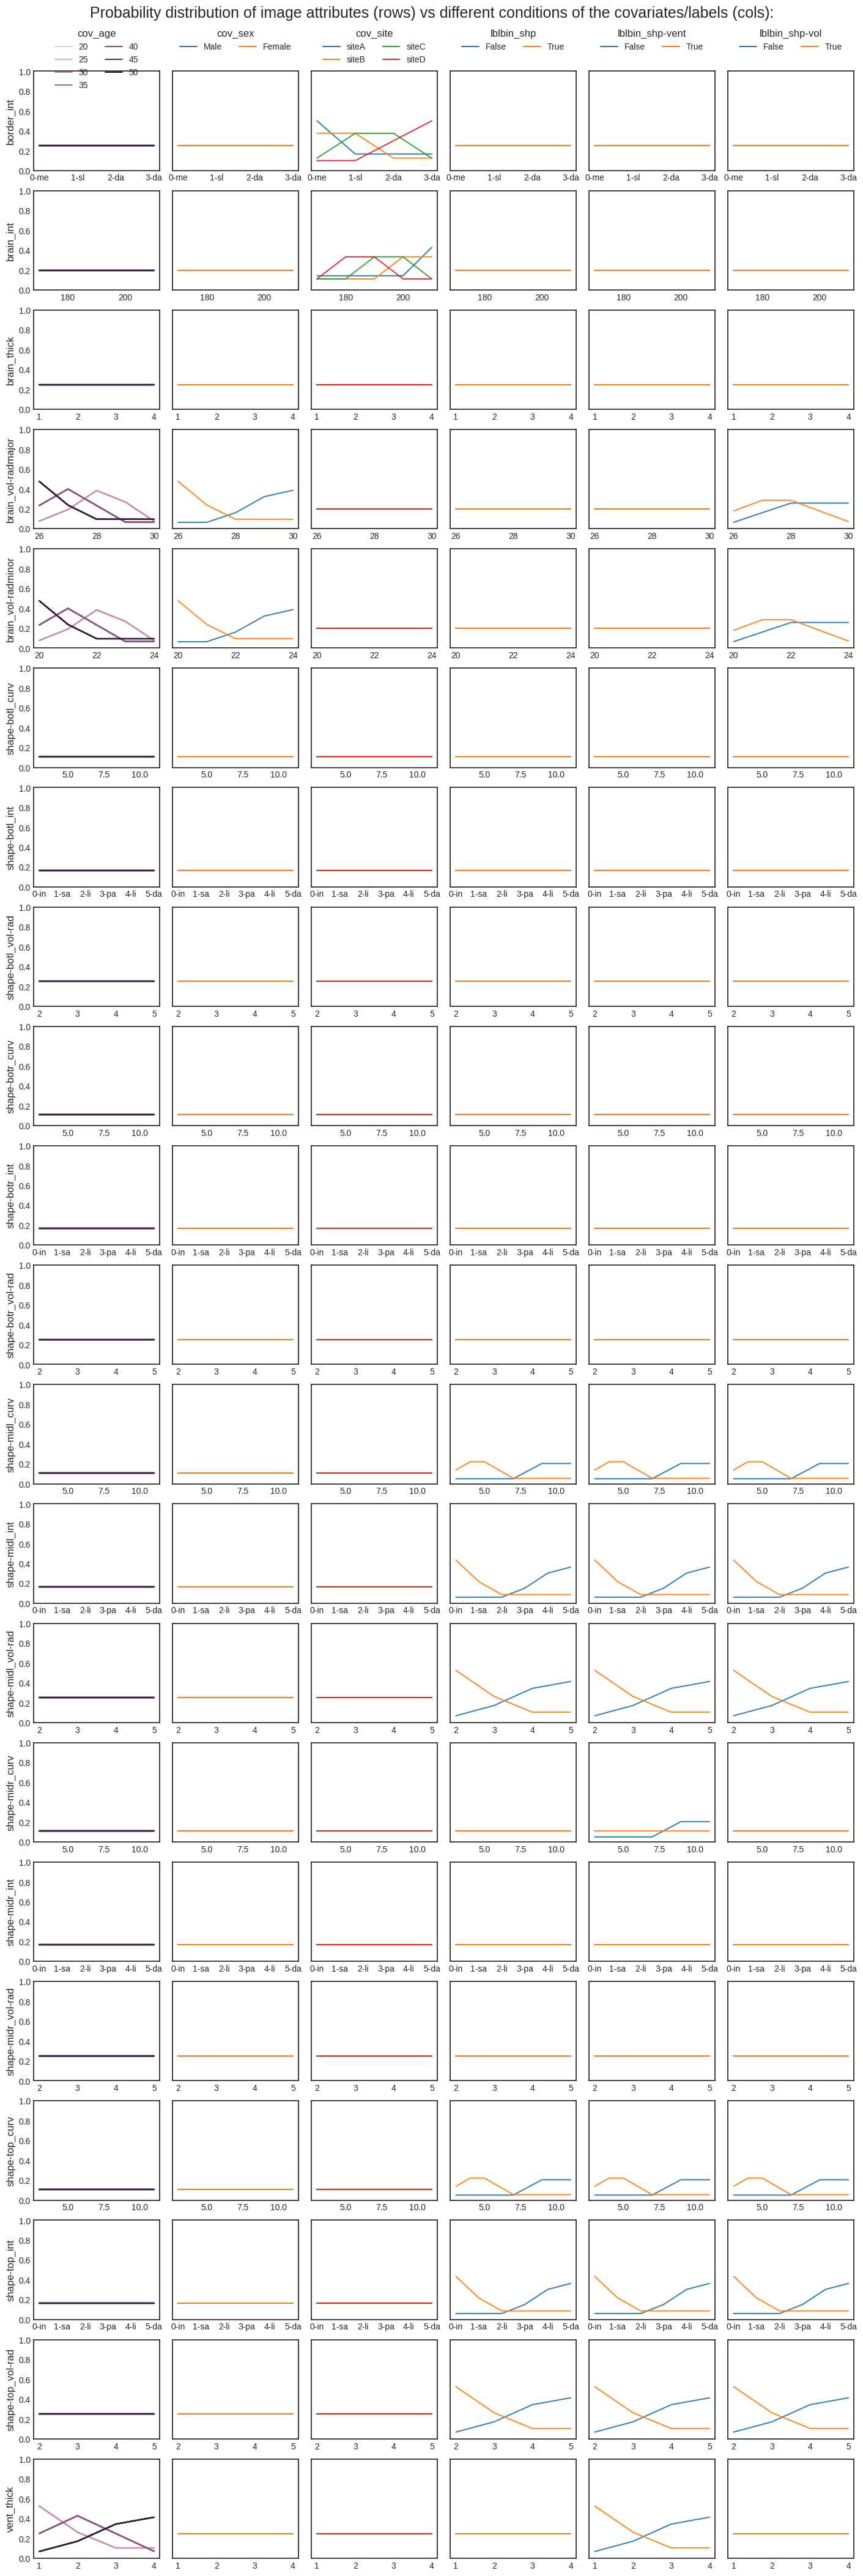

In [8]:
# check config file before generate toybrains it used shapes directory
ToyBrainsData(config=DATA_GEN_CONFIG).show_current_config()
# ToyBrainsData(config='demo').show_current_config()

## generate toybrains dataset

In [9]:
# ! python create_toybrains.py -d --dir 'toybrains30k' -n 30000 -c $DATA_GEN_CONFIG

## run baseline pipelines

In [32]:
DATA_DIR="toybrains30k"
OUT_DIR='results/toybrains30k'

In [36]:
run_baseline(DATA_DIR+"/toybrains_n30000.csv", 
             DATA_DIR=DATA_DIR, DATA_N=30000, OUT_DIR=OUT_DIR)

running a total of 25 different settings of [input features] x [labels]


100%|██████████| 25/25 [01:51<00:00,  4.48s/it]

TOTAL RUNTIME: 0:01:52


### Visualize results

In [37]:
df = pd.read_csv(OUT_DIR+"/run.csv")
df

,inp,out,model,model_config,train_metric,validation_metric,test_metric,dataset,type,n_samples
0,c,cov_sex,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",1.000000,1.000000,1.000000,toybrains30k,baseline,30000
1,c,cov_site,multinomial_logistic_regression,"(4, Pipeline(steps=[('columntransformer',\n ...",1.000000,1.000000,1.000000,toybrains30k,baseline,30000
2,c,lblbin_shp,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.511208,0.500333,0.496667,toybrains30k,baseline,30000
3,c,lblbin_shp-vent,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.503542,0.501333,0.497667,toybrains30k,baseline,30000
4,c,lblbin_shp-vol,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.509208,0.473667,0.498667,toybrains30k,baseline,30000
5,c-y,cov_sex,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.504375,0.501667,0.498333,toybrains30k,baseline,30000
6,c-y,cov_site,multinomial_logistic_regression,"(4, Pipeline(steps=[('columntransformer',\n ...",0.258625,0.247000,0.239000,toybrains30k,baseline,30000
7,c-y,lblbin_shp,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.511208,0.500333,0.496667,toybrains30k,baseline,30000
8,c-y,lblbin_shp-vent,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.503542,0.501333,0.497667,toybrains30k,baseline,30000
9,c-y,lblbin_shp-vol,logistic_regression,"(2, Pipeline(steps=[('columntransformer',\n ...",0.509208,0.473667,0.498667,toybrains30k,baseline,30000


TBC


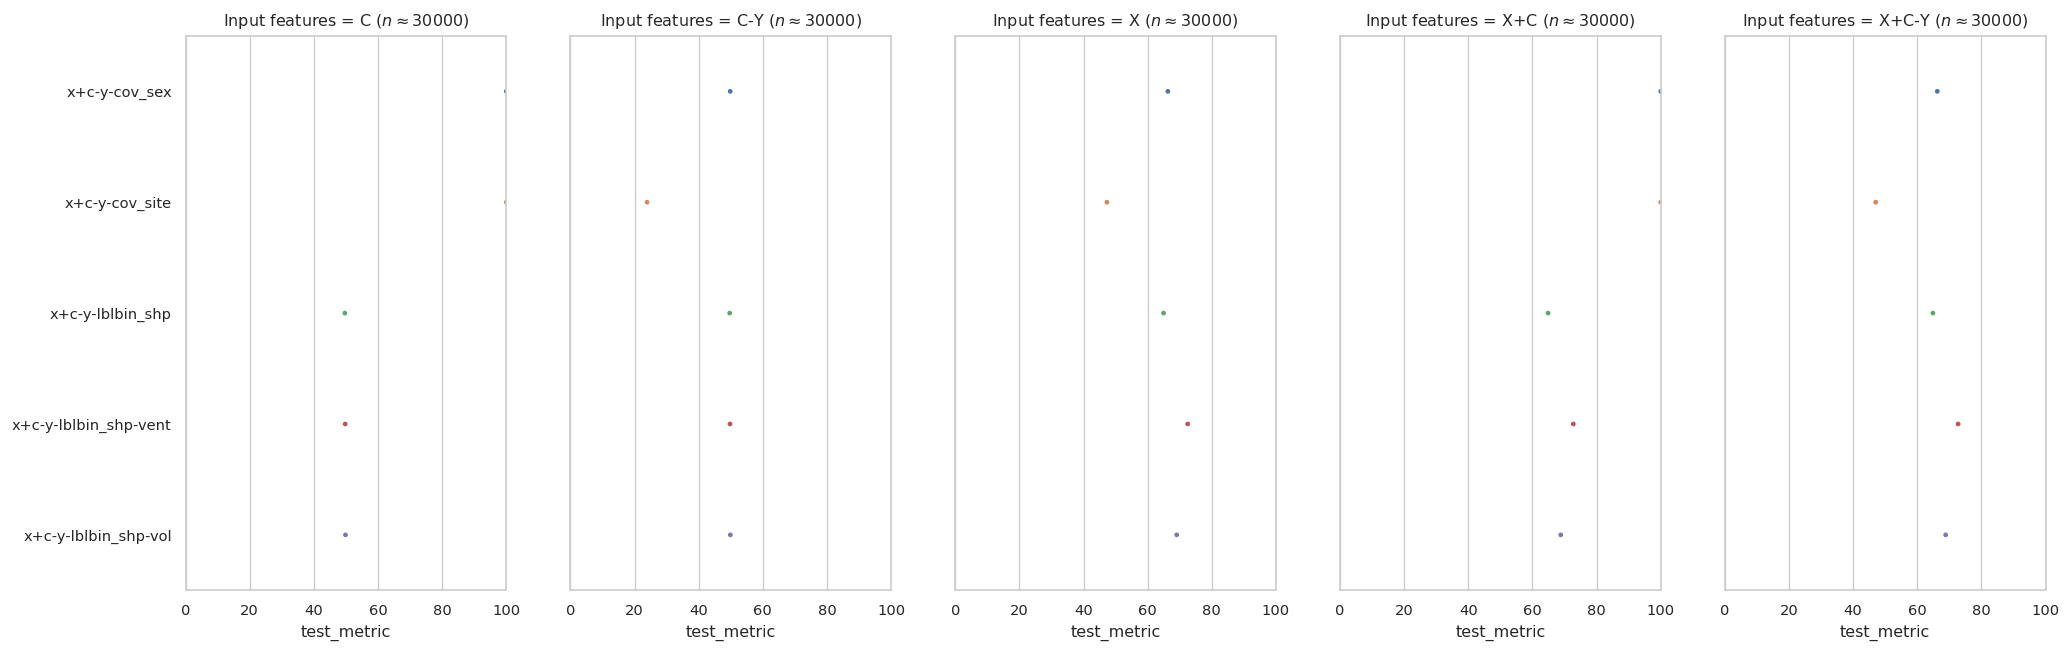

In [50]:
fig, axes = plot_result(df, x_axis_col='test_metric', groupby='inp', title='Input features =')
plt.show()